In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [12]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/VerticalSection72_6.nc')
dfU = xr.open_dataset('C:/Users/eirik/Master/Data/U_interp.nc')
dfV = xr.open_dataset('C:/Users/eirik/Master/Data/V_interp.nc')
display(df)

<xarray.Dataset>
Dimensions:    (Z: 216, Zp1: 217, Zu: 216, Zl: 216, X: 435, Y: 1, Xp1: 436,
                Yp1: 2, time: 1460, time_midp: 1459)
Coordinates: (12/18)
  * Z          (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * Zp1        (Zp1) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zu         (Zu) float64 -2.0 -5.0 -9.0 ... -3.913e+03 -3.932e+03 -3.951e+03
  * Zl         (Zl) float64 0.0 -2.0 -5.0 ... -3.894e+03 -3.913e+03 -3.932e+03
  * X          (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
  * Y          (Y) float64 72.59
    ...         ...
  * time       (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
    YU         (Y, Xp1) float64 ...
    XU         (Y, Xp1) float64 ...
    YV         (Yp1, X) float64 ...
    XV         (Yp1, X) float64 ...
  * time_midp  (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 2018-08-31T...
Data variables:
    Depth      (Y, X) float64 ...
    V          (time, Z, Yp1, X) float64 ...
    Temp       (time, Z, Y, X) float64 ...
    S          (time, Z, Y, X) float64 ...
    Eta        (time, Y, X) float64 ...
    EKE        (time, Z, Y, X) float64 ...
Attributes: (12/24)
    MITgcm_version:          checkpoint67l
    build_user:              malmans2@jhu.edu
    build_host:              compute0673
    build_date:              Fri Nov  8 01:36:45 EST 2019
    MITgcm_URL:              http://mitgcm.org
    MITgcm_tag_id:           
    ...                      ...
    OceanSpy_parameters:     {'rSphere': 6371.0, 'eq_state': 'mdjwf', 'rho0':...
    OceanSpy_name:           IGPyearlong
    OceanSpy_description:    High-resolution numerical simulation carried out...
    OceanSpy_projection:     Mercator(**{})
    OceanSpy_grid_coords:    {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': None, ...
    OceanSpy_grid_periodic:  []

In [3]:
S = df['S'].sel(Y=72.6,method='nearest')
S_3Month = S.resample(time='3ME').mean(dim='time')
S_Mean = S.mean(dim='time')
display(S.Y)

<xarray.DataArray 'Y' ()>
array(72.58998644)
Coordinates:
    Y        float64 72.59
Attributes:
    long_name:  latitude of cell center
    units:      degrees_north

In [6]:
display(S_3Month.time.values)

array(['2017-09-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000'], dtype='datetime64[ns]')

Text(0.5, 0.98, 'Salinity')

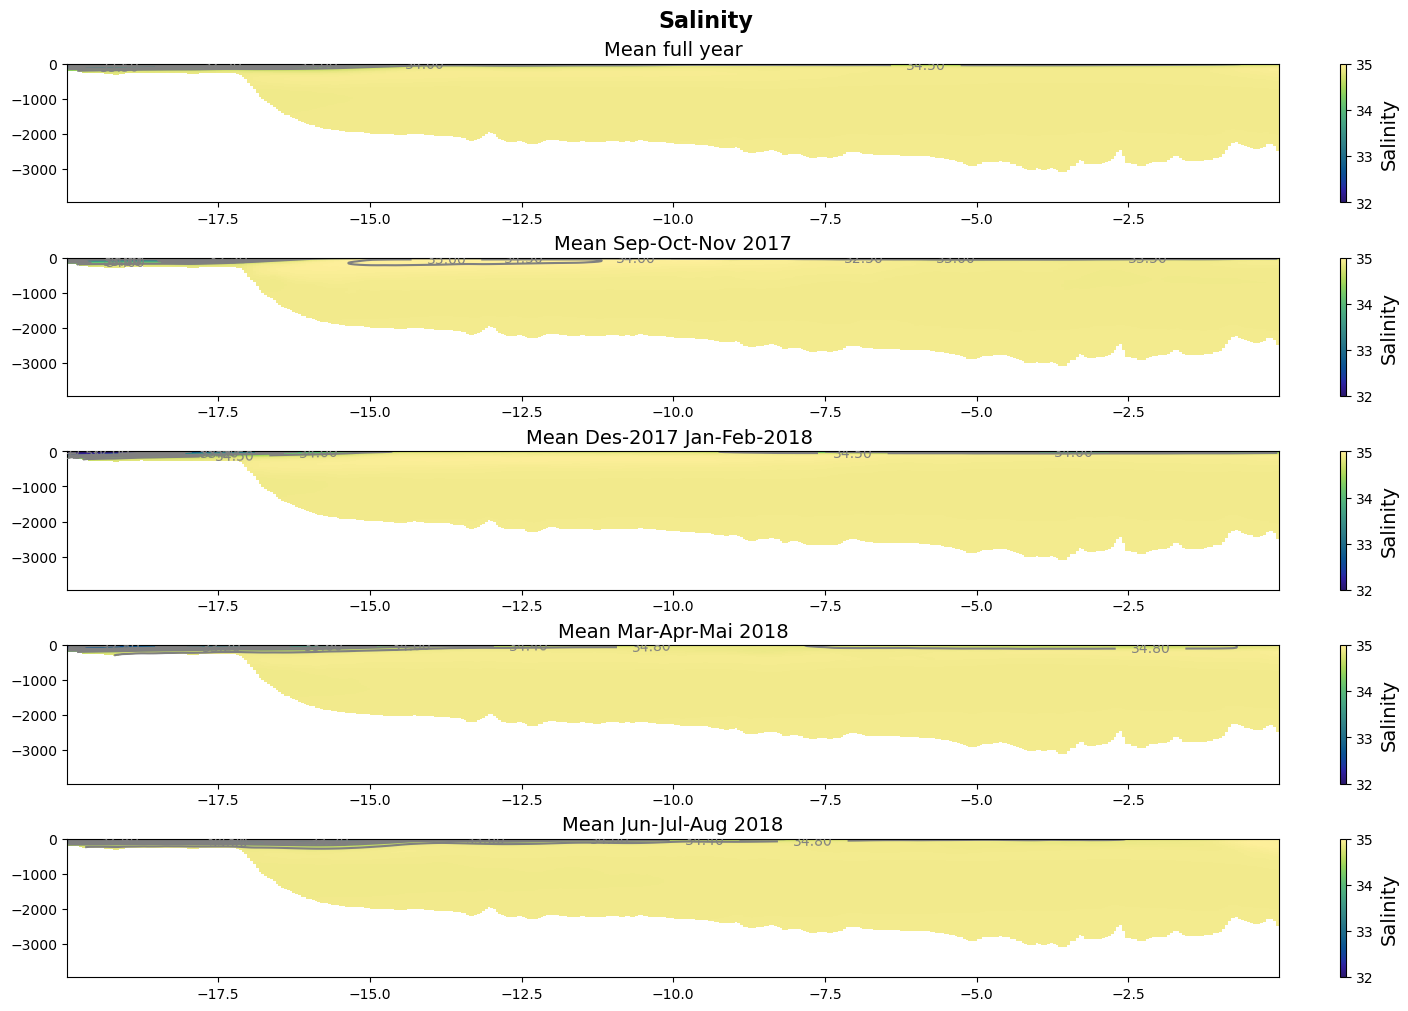

In [5]:
data3M = S_3Month
dataM = S_Mean
cmap = cmo.haline
Name = 'Salinity'
vmin = 32
vmax = 35

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,10),layout='constrained')

# Mean full year
mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
cbar1 = fig.colorbar(mesh1)
cbar1.set_label('Salinity',fontsize=14)
cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax1.set_title('Mean full year',fontsize=14)

# Sep-Oct-Nov
mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
cbar2 = fig.colorbar(mesh2)
cbar2.set_label('Salinity',fontsize=14)
cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)

# Des-Jan-Feb
mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
cbar3 = fig.colorbar(mesh3)
cbar3.set_label('Salinity',fontsize=14)
cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)

# Mar-Apr-Mai
mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
cbar4 = fig.colorbar(mesh4)
cbar4.set_label('Salinity',fontsize=14)
cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)

# Jun-Jul-Aug
mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
cbar5 = fig.colorbar(mesh5)
cbar5.set_label('Salinity',fontsize=14)
cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)

fig.suptitle(Name,fontweight='bold',fontsize=16)

In [48]:
def vertical_plot_3M_M(data3M,dataM,cmap,plotName,fileName=str(),vmin=None,vmax=None,cbarName=str(),interpCoords=False,set_depth=None,addcontour=False):
    """
    Plotting the choosen values for each 3M period with first plot displaying the mean.\n
    The layout is specificly created for the full year run of the IGP dataset.\n
    \n
    data3M: Resampled data with three month mean\n
    dataM: Mean of dataset with dim='time'
    """
    if set_depth:
        if set_depth >0 or type(set_depth) != int:
            print(ValueError('set_depth > 0 is given, depth should be a negative value and int'))
    if interpCoords:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,15),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.Xp1,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax1.contour(dataM.Xp1,dataM.Z,dataM,colors='grey')
            ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax1.set_title('Mean full year',fontsize=14)
        ax1.set_ylim(set_depth,0)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.Xp1,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax2.contour(data3M.Xp1,data3M.Z,data3M[0],colors='grey')
            ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)
        ax2.set_ylim(set_depth,0)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.Xp1,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax3.contour(data3M.Xp1,data3M.Z,data3M[1],colors='grey')
            ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)
        ax3.set_ylim(set_depth,0)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.Xp1,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax4.contour(data3M.Xp1,data3M.Z,data3M[2],colors='grey')
            ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)
        ax4.set_ylim(set_depth,0)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.Xp1,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax5.contour(data3M.Xp1,data3M.Z,data3M[3],colors='grey')
            ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)
        ax5.set_ylim(set_depth,0)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

    else:
        fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(14,15),layout='constrained')

        # Mean full year
        mesh1 = ax1.pcolormesh(dataM.X,dataM.Z,dataM,cmap=cmap,vmin=vmin,vmax=vmax)
        cbar1 = fig.colorbar(mesh1)
        cbar1.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax1.contour(dataM.X,dataM.Z,dataM,colors='grey')
            ax1.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax1.set_title('Mean full year',fontsize=14)
        ax1.set_ylim(set_depth,0)

        # Sep-Oct-Nov
        mesh2 = ax2.pcolormesh(data3M.X,data3M.Z,data3M[0],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar2 = fig.colorbar(mesh2)
        cbar2.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax2.contour(data3M.X,data3M.Z,data3M[0],colors='grey')
            ax2.clabel(cntr,fmt="%2.2f",use_clabeltext=True)

        ax2.set_title('Mean Sep-Oct-Nov 2017',fontsize=14)
        ax2.set_ylim(set_depth,0)

        # Des-Jan-Feb
        mesh3 = ax3.pcolormesh(data3M.X,data3M.Z,data3M[1],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar3 = fig.colorbar(mesh3)
        cbar3.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax3.contour(data3M.X,data3M.Z,data3M[1],colors='grey')
            ax3.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax3.set_title('Mean Des-2017 Jan-Feb-2018 ',fontsize=14)
        ax3.set_ylim(set_depth,0)

        # Mar-Apr-Mai
        mesh4 = ax4.pcolormesh(data3M.X,data3M.Z,data3M[2],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar4 = fig.colorbar(mesh4)
        cbar4.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax4.contour(data3M.X,data3M.Z,data3M[2],colors='grey')
            ax4.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax4.set_title('Mean Mar-Apr-Mai 2018',fontsize=14)
        ax4.set_ylim(set_depth,0)

        # Jun-Jul-Aug
        mesh5 = ax5.pcolormesh(data3M.X,data3M.Z,data3M[3],cmap=cmap,vmin=vmin,vmax=vmax)
        cbar5 = fig.colorbar(mesh5)
        cbar5.set_label(cbarName,fontsize=12)

        if addcontour:
            cntr = ax5.contour(data3M.X,data3M.Z,data3M[3],colors='grey')
            ax5.clabel(cntr,fmt="%2.2f",use_clabeltext=True)
        
        ax5.set_title('Mean Jun-Jul-Aug 2018',fontsize=14)
        ax5.set_ylim(set_depth,0)

        fig.suptitle(plotName,fontweight='bold',fontsize=16)
        plt.savefig(f'C:/Users/eirik/Master/Figures/{fileName}')

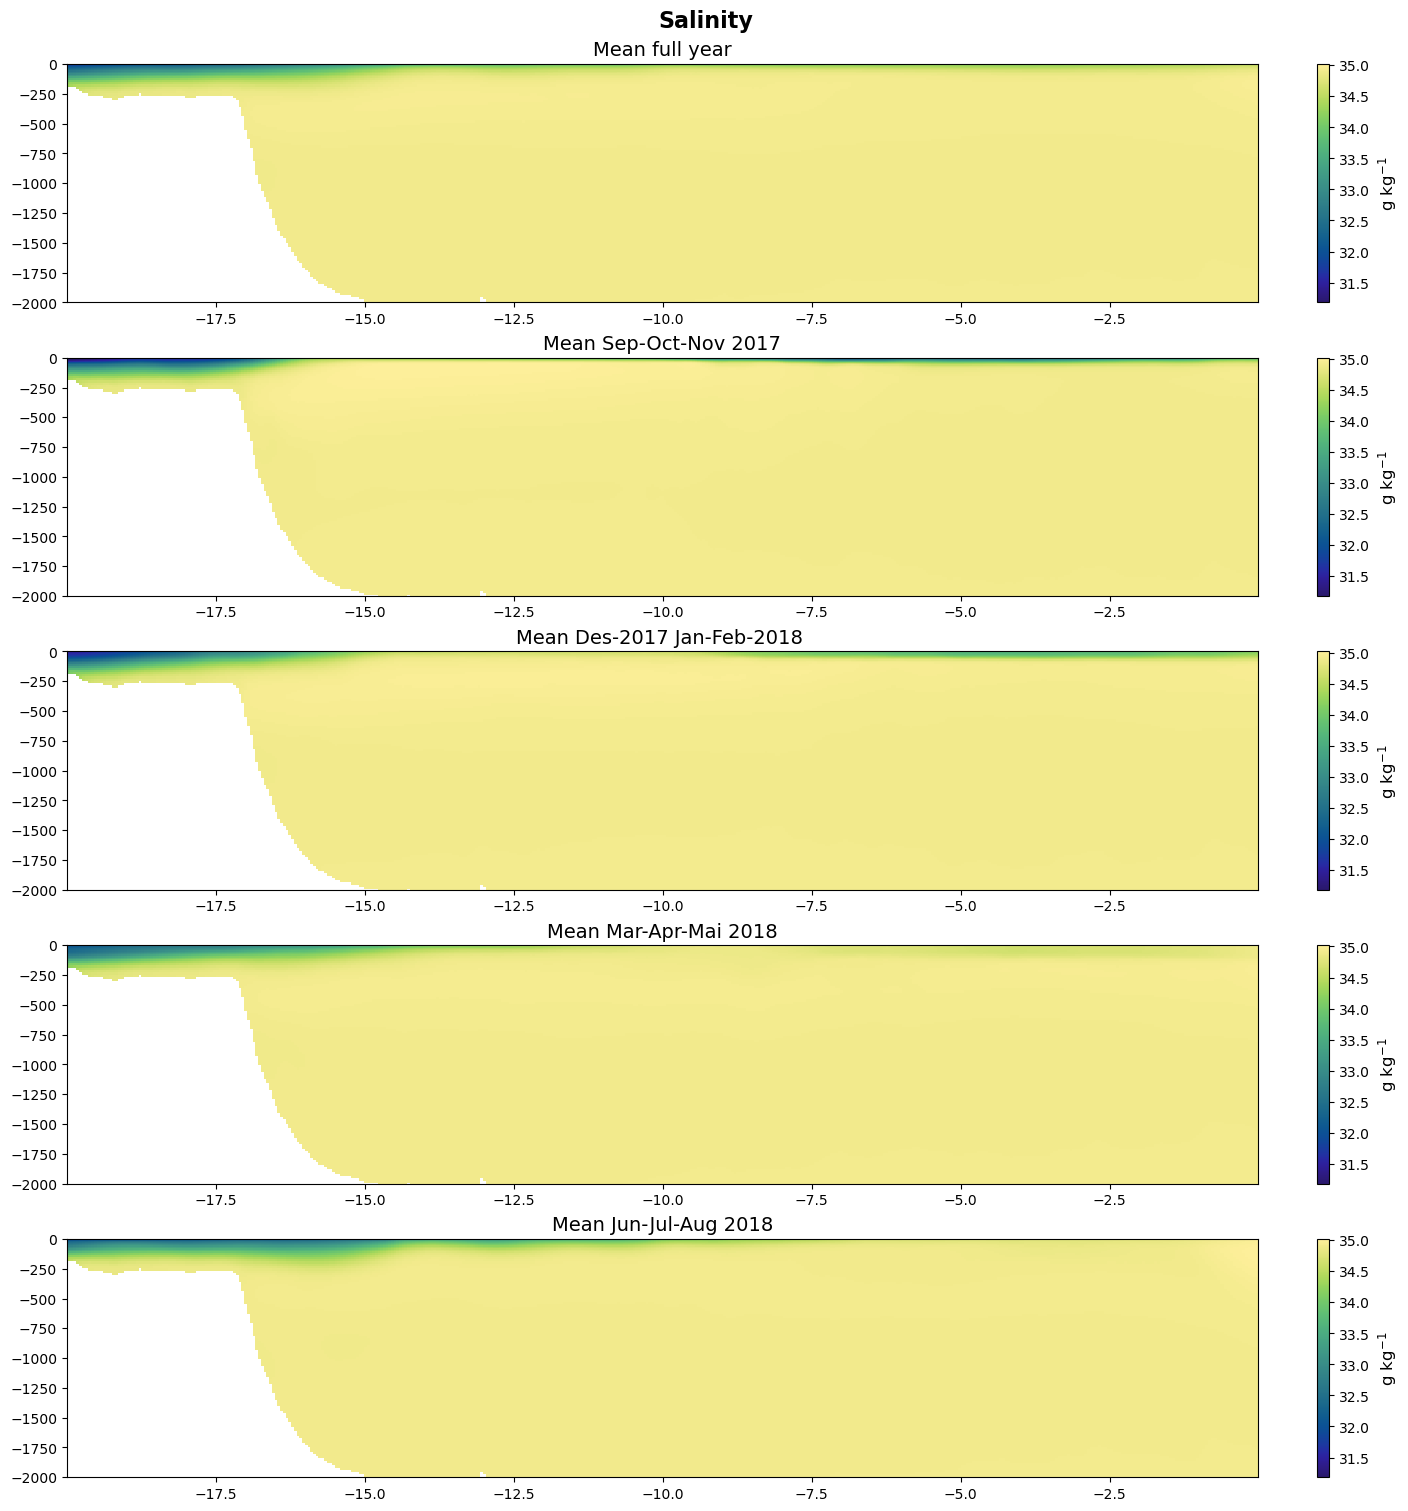

In [47]:
vertical_plot_3M_M(S_3Month,S_Mean,cmo.haline,'Salinity','Salinity3MYear',vmin=np.min(S_3Month),vmax=np.max(S_3Month),cbarName='g kg$^{-1}$',set_depth=-2000)

In [18]:
T = df['Temp'].sel(Y=72.6,method='nearest')
T_3Month = T.resample(time='3ME').mean(dim='time')
T_Mean = T.mean(dim='time')

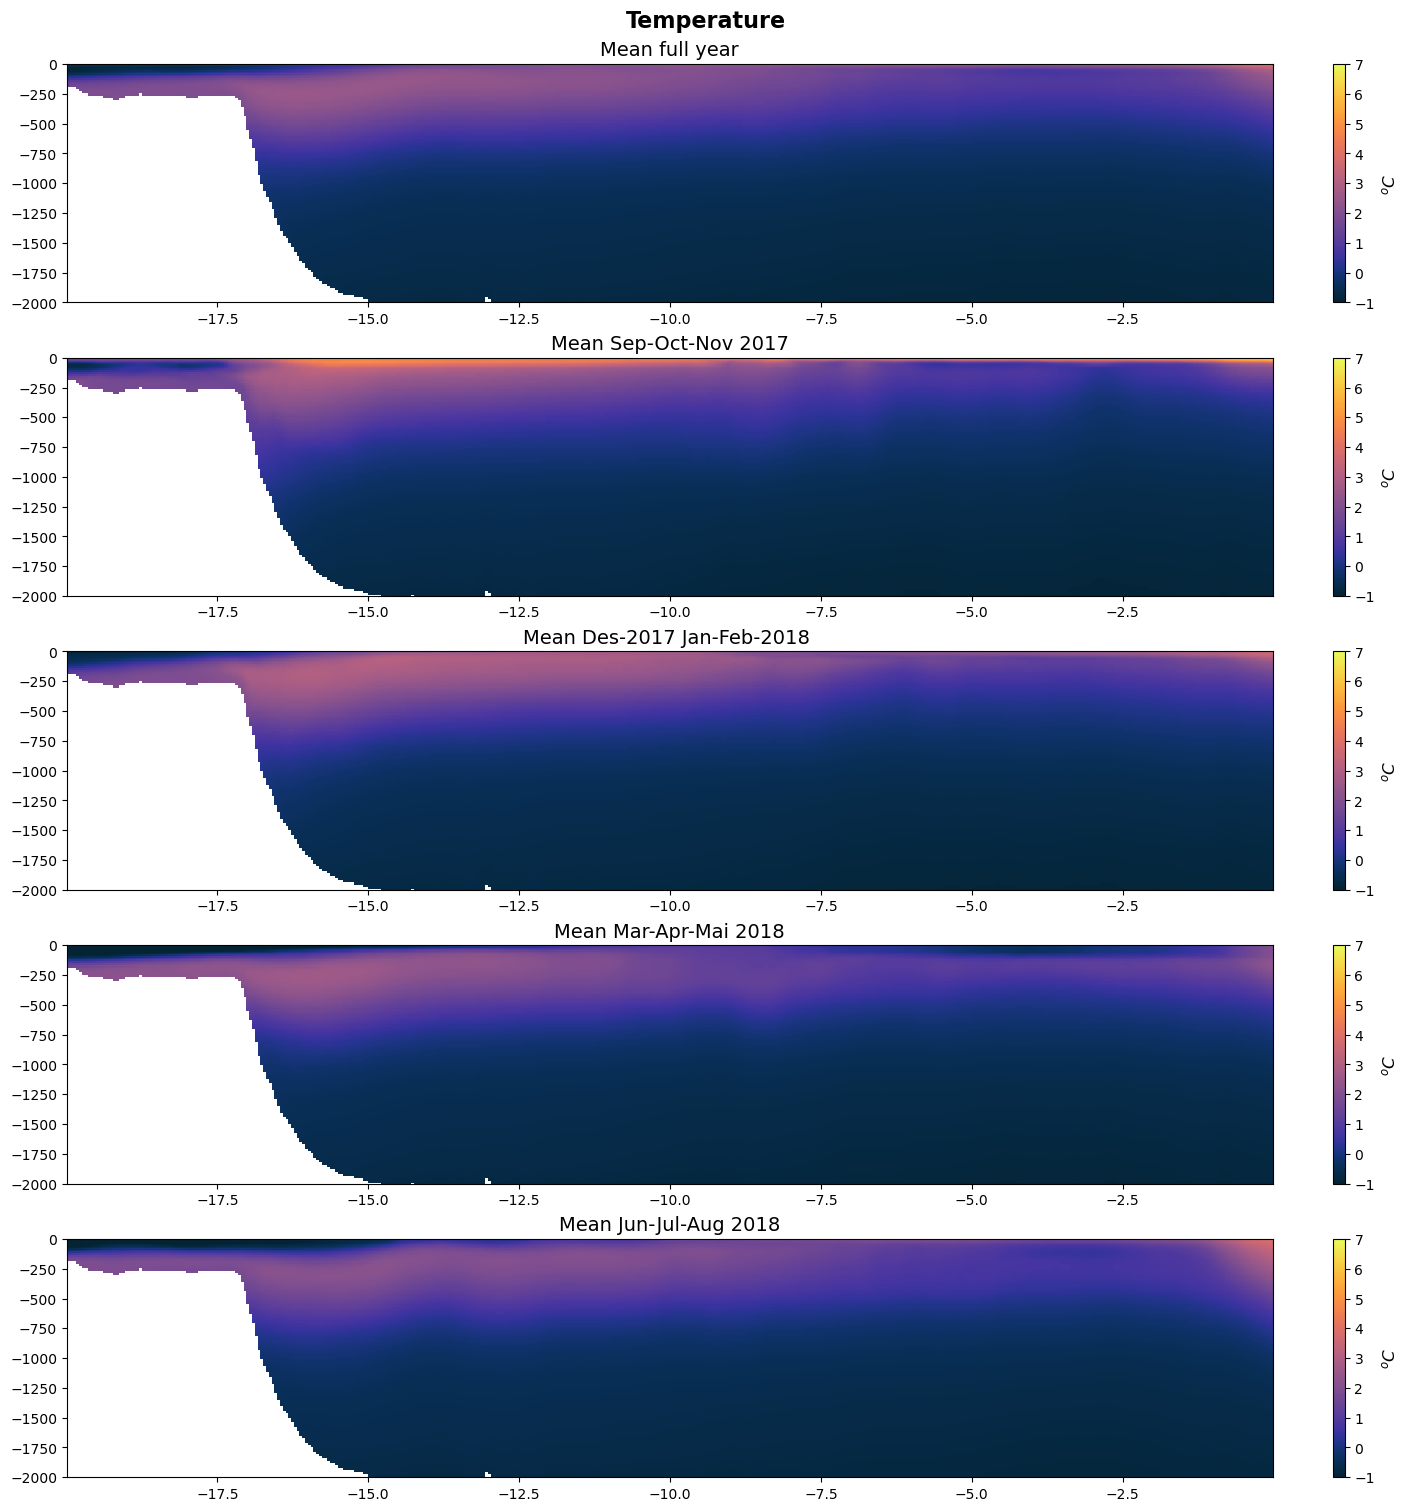

In [49]:
vertical_plot_3M_M(T_3Month,T_Mean,cmo.thermal,'Temperature','Temperature3MYear',vmin=-1,vmax=7,cbarName='$^oC$',set_depth=-2000)

In [13]:
V = df['V'].sel(Yp1=72.6,method='nearest')
V_3Month = V.resample(time='3ME').mean(dim='time')
V_Mean = V.mean(dim='time')

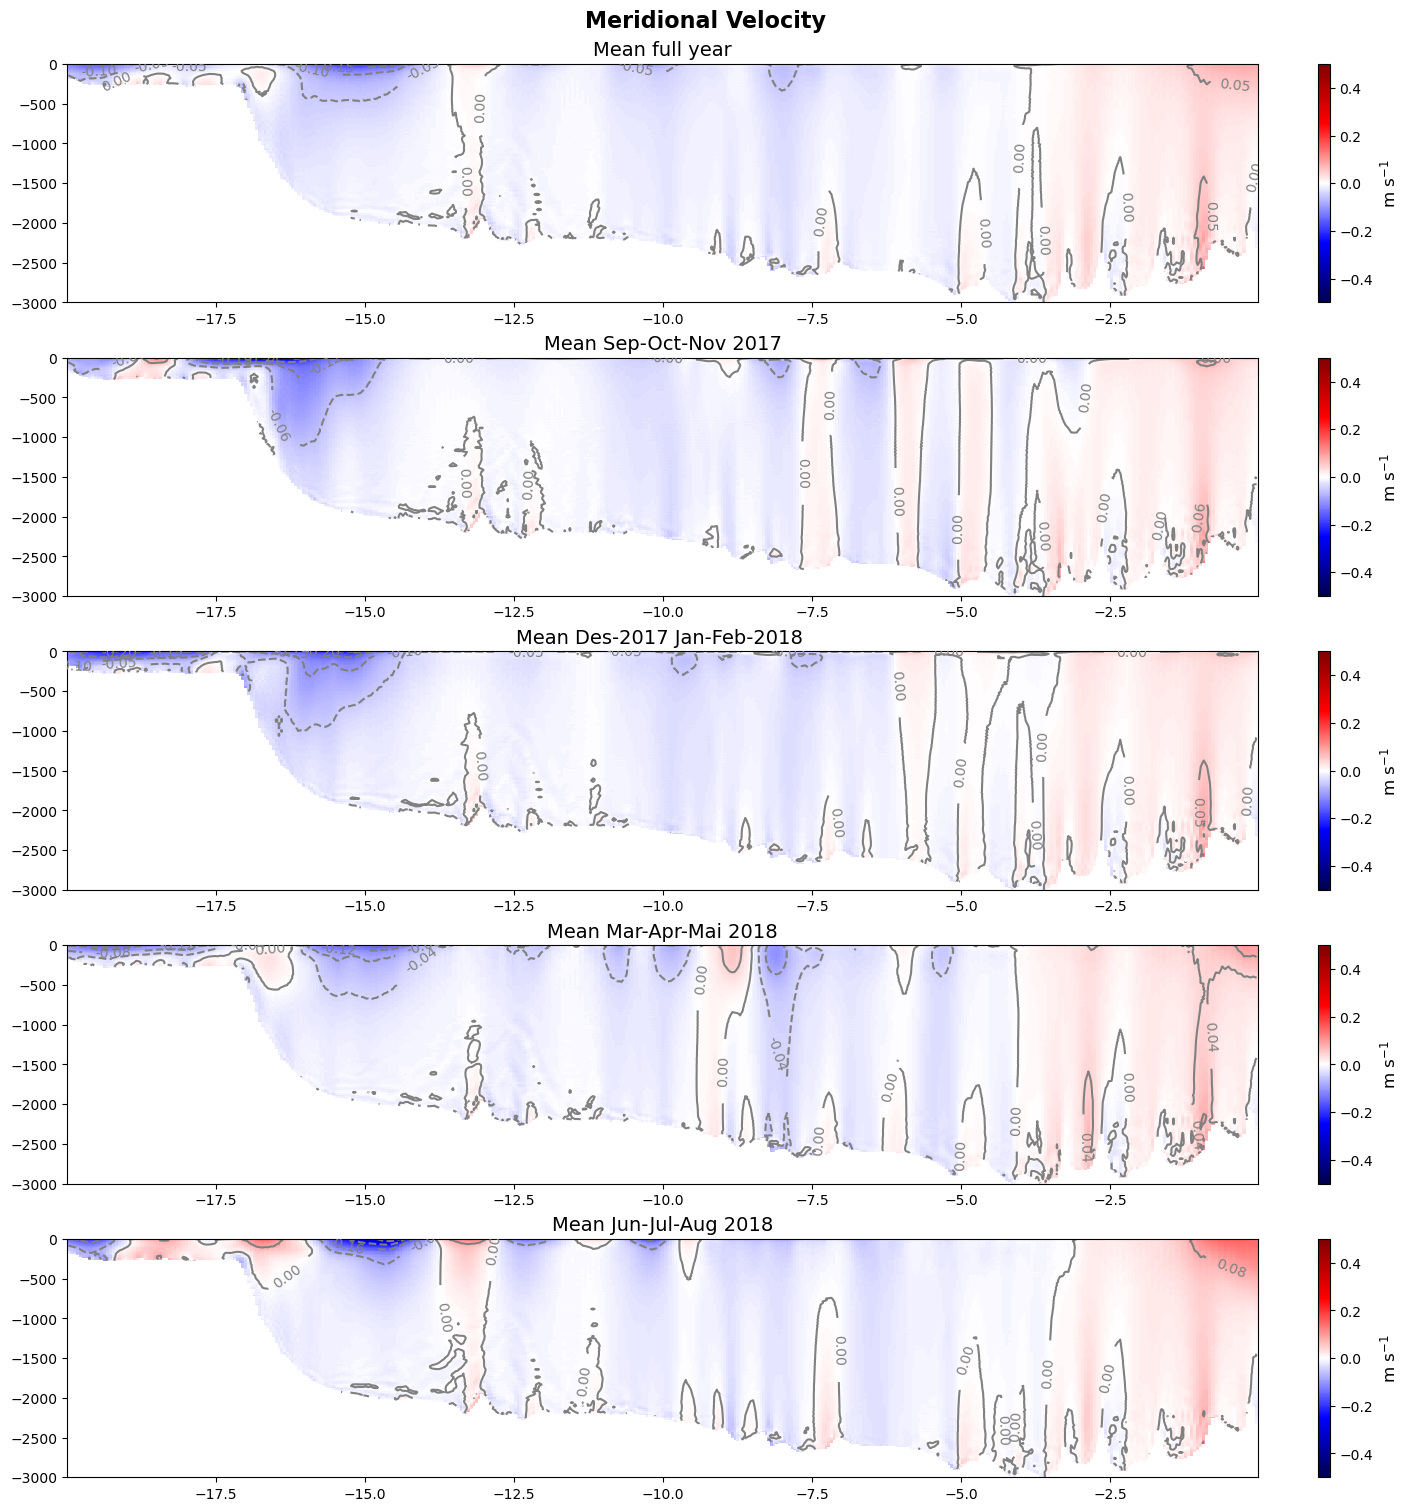

In [50]:
vertical_plot_3M_M(V_3Month,V_Mean,'seismic','Meridional Velocity','MeridionalVelocity3MYear',vmin=-0.5,vmax=0.5,cbarName='m s$^{-1}$',set_depth=-3000,addcontour=True)

In [55]:
od = ospy.OceanDataset(df)

In [56]:
od = od.compute.potential_density_anomaly()

Computing potential density anomaly using the following parameters: {'eq_state': 'mdjwf'}.


In [59]:
Sigma0 = od['Sigma0'].sel(Y=72.58998644,method='nearest')

In [61]:
display(Sigma0)

<xarray.DataArray 'Sigma0' (time: 1460, Z: 216, X: 435)>
array([[[24.69399072, 24.69860031, 24.70474692, ..., 27.08957845,
         27.08227029, 27.06791237],
        [24.69415511, 24.69871536, 24.70462679, ..., 27.08941699,
         27.0817694 , 27.06742987],
        [24.6951233 , 24.69983008, 24.70501482, ..., 27.09007848,
         27.08181076, 27.06758701],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[24.7286983 , 24.72742278, 24.72029823, ..., 27.09273919,
         27.08939648, 27.08251313],
        [24.72920622, 24.72854156, 24.72166958, ..., 27.09285145,
         27.08939982, 27.08238171],
        [24.73106463, 24.73162403, 24.7258221 , ..., 27.0934694 ,
         27.08981217, 27.0824879 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[25.1083239 , 25.12588667, 25.14766338, ..., 26.99952109,
         26.99331732, 26.98621227],
        [25.12919081, 25.14602843, 25.16624945, ..., 27.00063654,
         26.99440461, 26.9872666 ],
        [25.17352131, 25.18373878, 25.19677154, ..., 27.00155673,
         26.99526943, 26.98808658],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * Z        (Z) float64 -1.0 -3.5 -7.0 ... -3.904e+03 -3.922e+03 -3.942e+03
  * X        (X) float64 -19.97 -19.92 -19.87 ... -0.1493 -0.09658 -0.04373
    Y        float64 72.59
    XC       (X) float64 ...
    YC       (X) float64 ...
  * time     (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
Attributes:
    units:                kg/m^3
    long_name:            potential density anomaly
    OceanSpy_parameters:  {'eq_state': 'mdjwf'}

In [62]:
rho_3Month = Sigma0.resample(time='3ME').mean(dim='time')
rho_Mean = Sigma0.mean(dim='time')

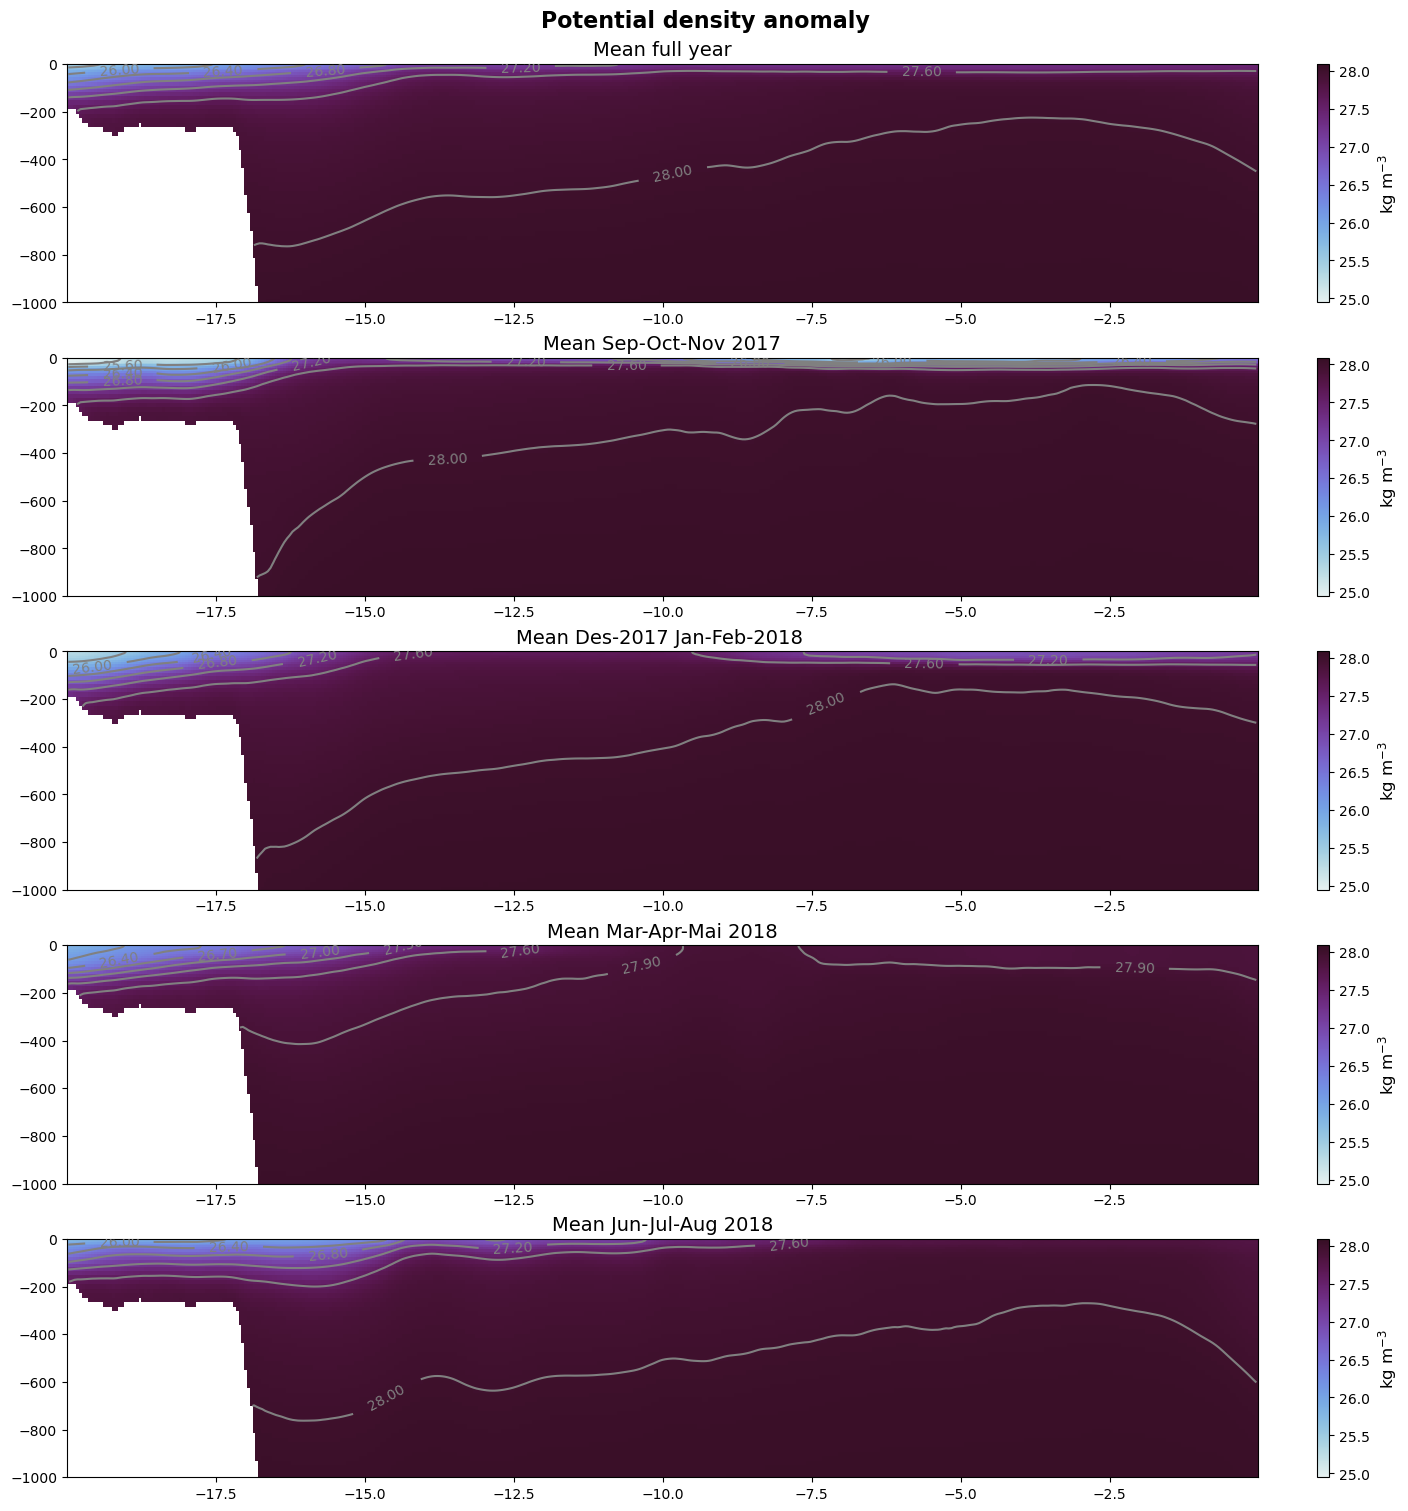

In [65]:
vertical_plot_3M_M(rho_3Month,rho_Mean,cmap=cmo.dense,
                   plotName='Potential density anomaly',
                   fileName='PotentialDensityAnom3MYear',
                   vmin=np.min(rho_3Month),vmax=np.max(rho_3Month),
                   cbarName='kg m$^{-3}$',set_depth=-1000,addcontour=True)